In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import plotly.express as px
import matplotlib.patches as mpatches
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv("Credit Card_Clustering.csv")
print(df)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [4]:
#print basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
print(df["TENURE"].unique())

[12  8 11  9 10  7  6]


## Dealing With Missing Values

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df[df['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [8]:
df=df.drop(5203)

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

## Exploratory Data Analysis

In [12]:
##
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,845.003358,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.905284,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.452292,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Univariate Analysis

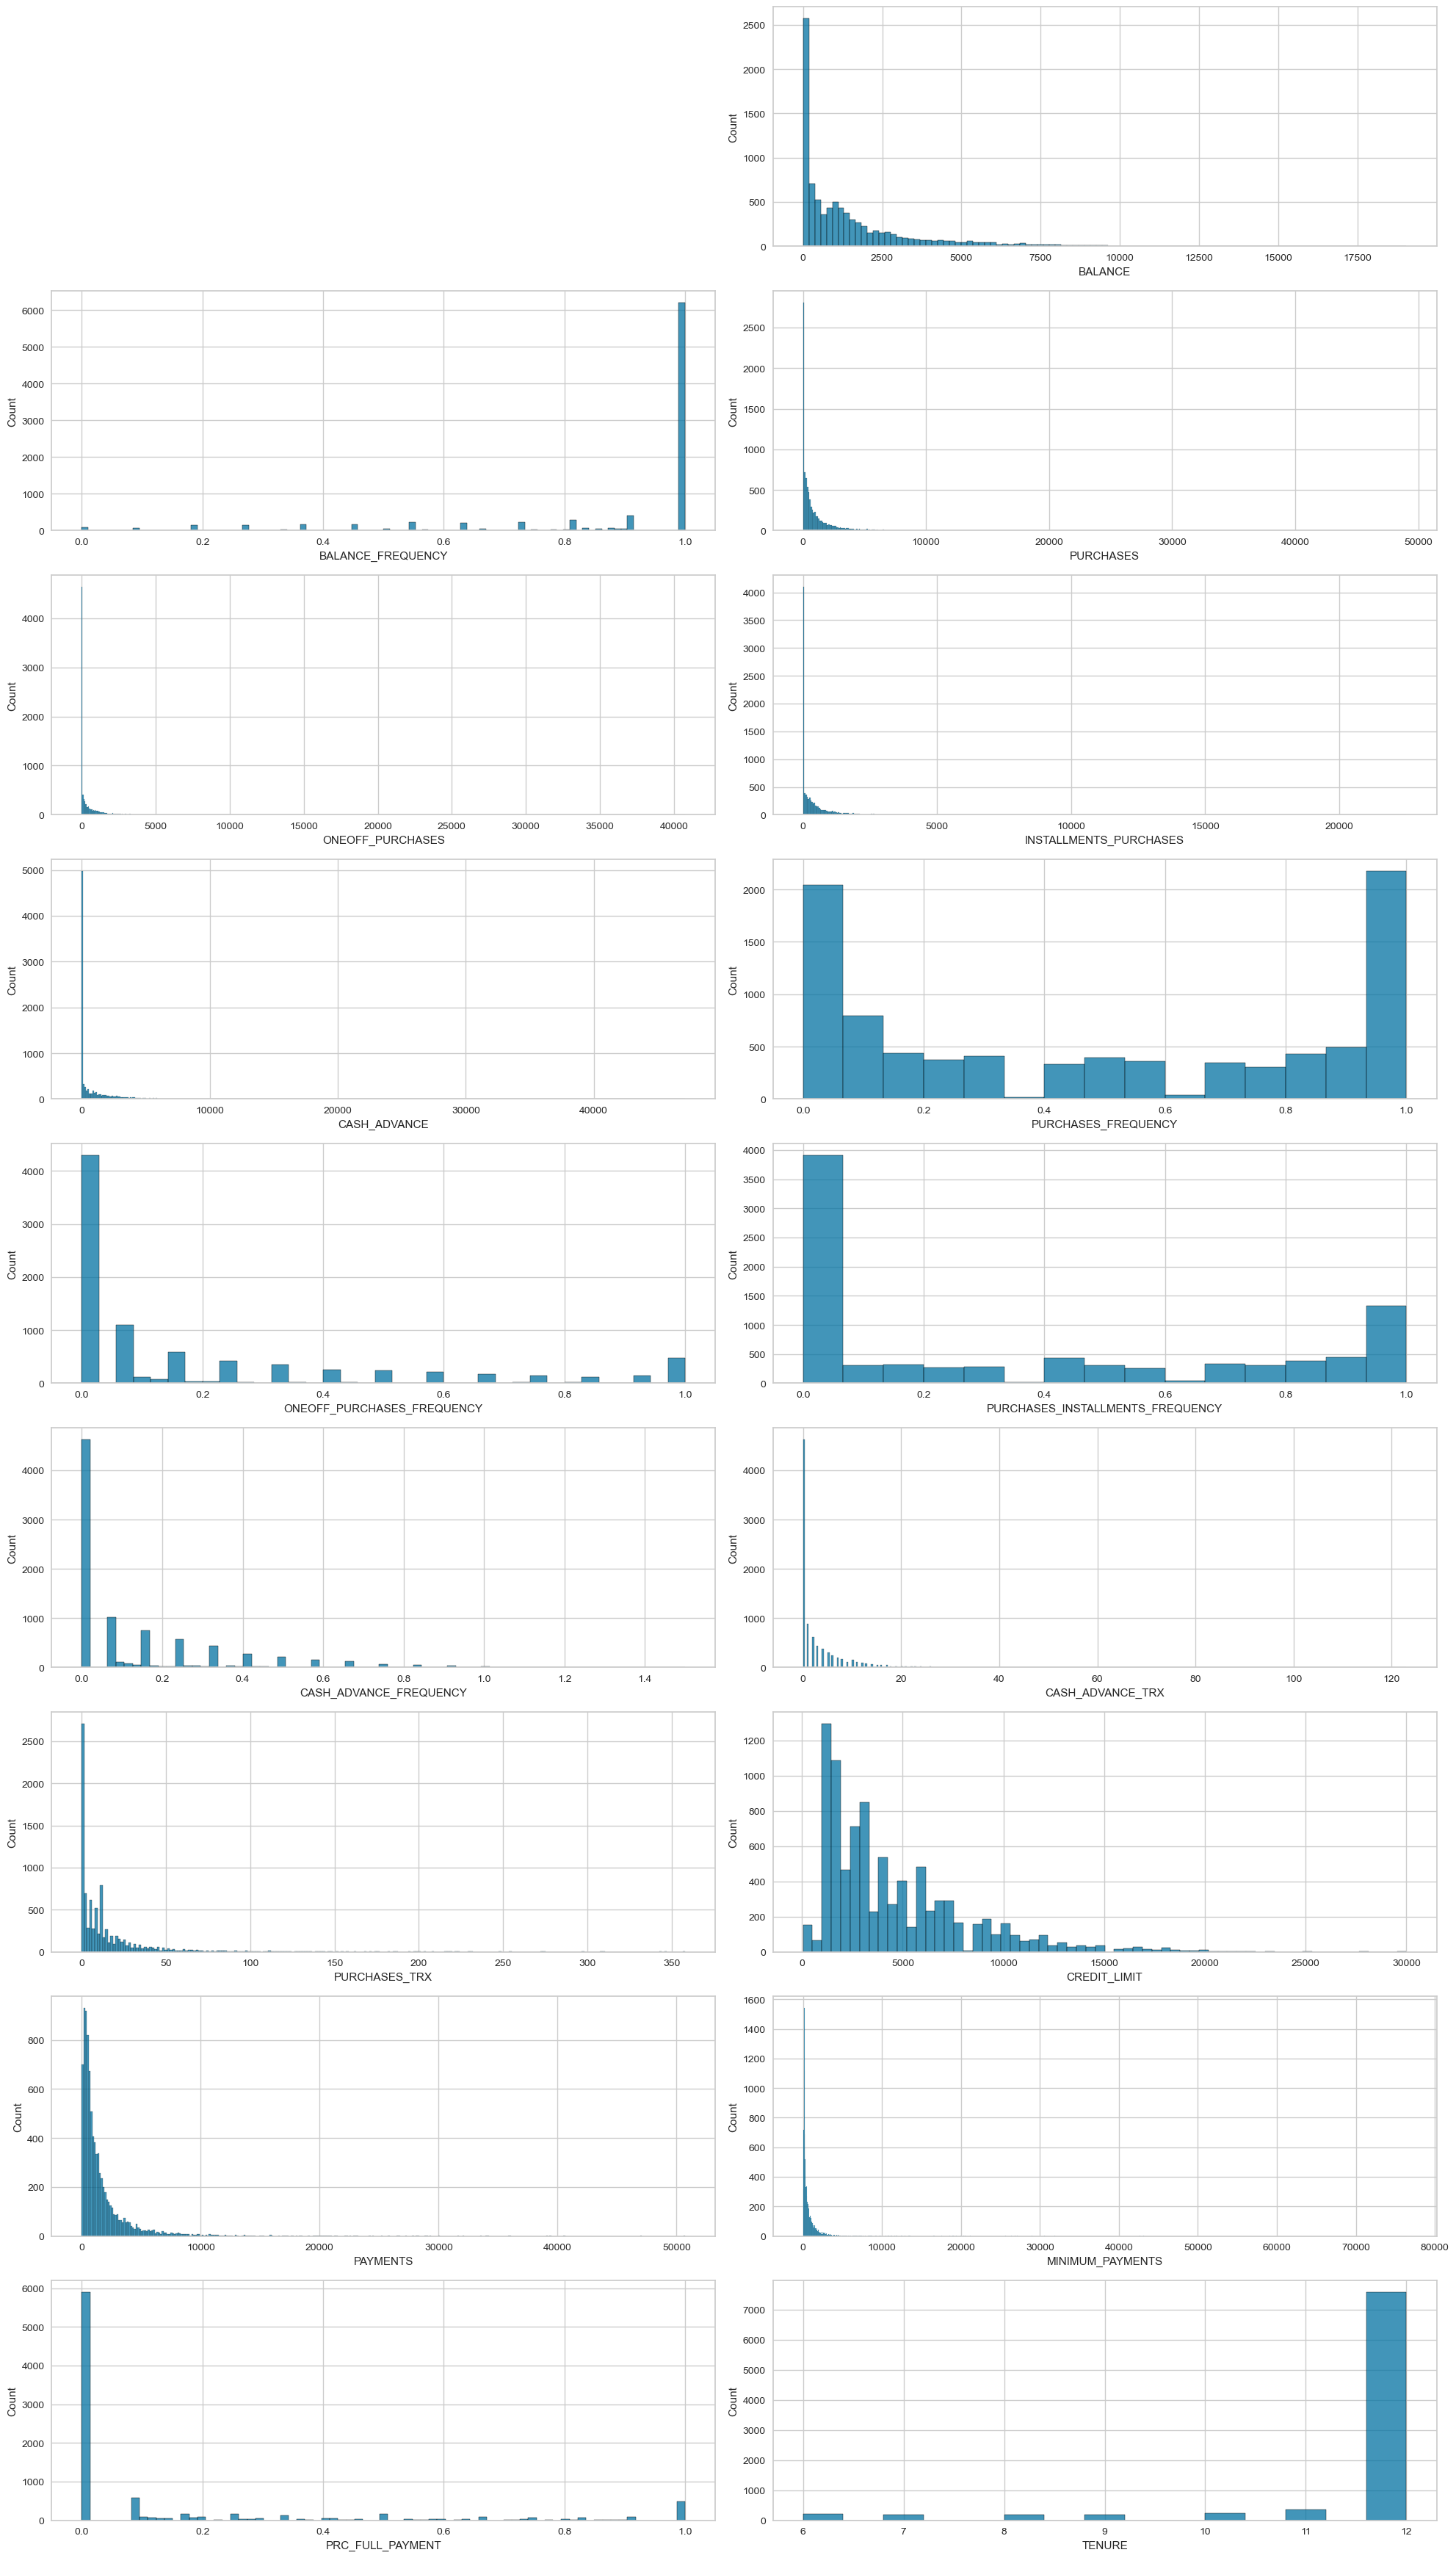

In [14]:
# Visualizing distributions of each feature and know if the data is normal.
plt.figure(figsize=(20, 35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        plt.subplot(9, 2, i+1)  # Creating a subplot
        sns.histplot(df[col])   # Using histplot for numerical data
        plt.xlabel(col)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [15]:
## Dealing with outlier using Z Score
z_threshold = 3

# Calculate Z-scores for numerical columns
z_scores = stats.zscore(df.select_dtypes(include=np.number))

# Identify rows containing outliers
outlier_rows = np.any(np.abs(z_scores) > z_threshold, axis=1)

# Remove outlier rows from the DataFrame
df = df[~outlier_rows]

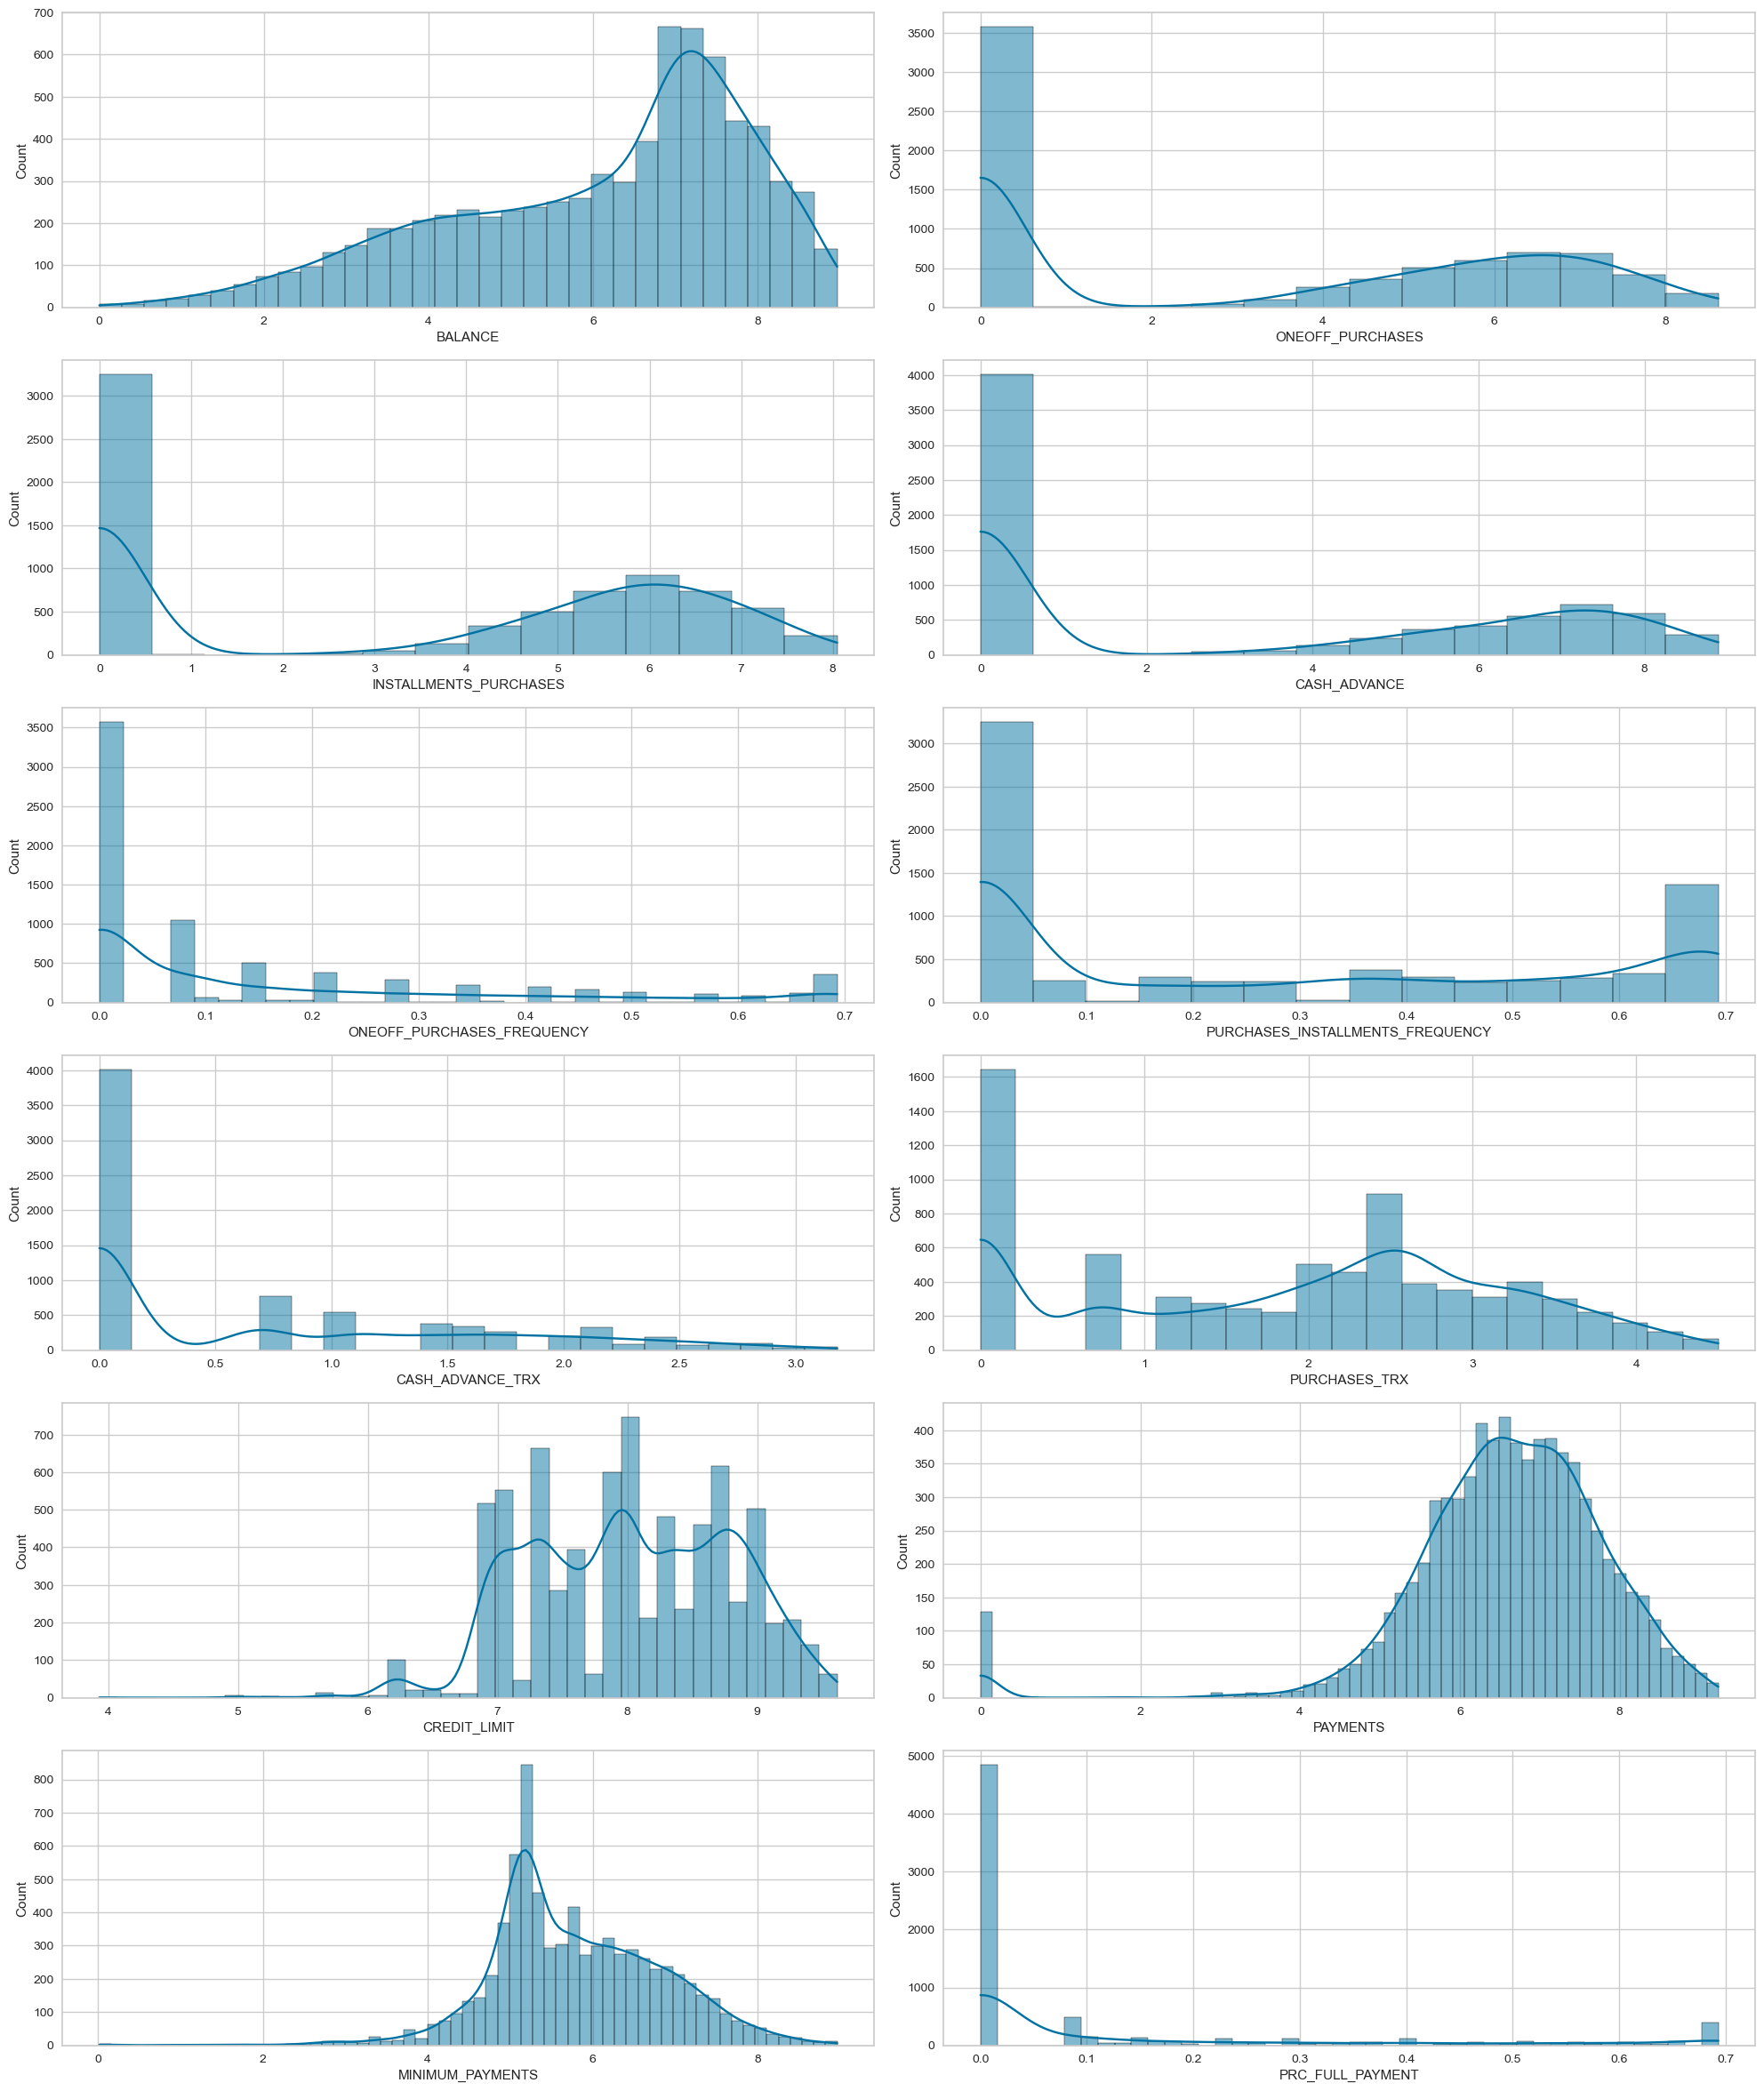

In [16]:

# Dealing with the skewness
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
        'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
        'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
        'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

# Apply logarithmic transformation to selected columns
for col in cols:
    df[col] = np.log1p(df[col])

# Visualize transformed distributions
plt.figure(figsize=(20, 35))

for i, col in enumerate(cols):
    if df[col].dtype != 'object':
        plt.subplot(9, 2, i+1)
        sns.histplot(df[col], kde=True)  # Plot histogram with KDE
        plt.xlabel(col)

plt.tight_layout()
plt.show()

final_data = df

In [17]:
#Standardising the data
standardScaler = StandardScaler()

columns_to_scale = []

for col in final_data.columns:
    if final_data[col].dtype != "object":
        columns_to_scale.append(col)

# Scale the selected columns using StandardScaler
final_data[columns_to_scale] = standardScaler.fit_transform(final_data[columns_to_scale])
display(final_data)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,-1.272056,-0.334911,-0.641448,-0.990799,0.418975,-0.891595,-0.805098,-0.724043,-0.666199,-0.690806,-0.794520,-0.589008,-1.440578,-0.954050,-0.827096,-0.563144,0.312187
1,C10002,1.072770,0.091127,-0.734487,-0.990799,-1.093774,1.664338,-1.225631,-0.724043,-0.953328,0.883825,0.987867,-1.436534,1.084193,1.296155,1.125068,0.388807,0.312187
2,C10003,0.937875,0.517164,0.019551,1.109529,-1.093774,-0.891595,1.297564,2.581752,-0.953328,-0.690806,-0.794520,0.542201,1.173737,-0.114254,0.610889,-0.563144,0.312187
3,C10004,0.719801,-1.186986,0.727420,1.318378,-1.093774,0.662118,-1.015366,-0.342300,-0.953328,-0.165931,-0.026888,-0.901805,1.173737,-4.928656,-0.056726,-0.563144,0.312187
4,C10005,0.335124,0.517164,-0.718883,-0.096201,-1.093774,-0.891595,-1.015366,-0.342300,-0.953328,-0.690806,-0.794520,-0.901805,-1.204132,-0.049564,-0.290193,-0.563144,0.312187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8876,C19117,-0.692902,-0.654440,-0.358761,0.889991,-1.093774,0.605981,0.035966,1.209723,-0.953328,0.096509,0.740745,0.167655,-2.339019,-1.488891,-1.019914,-0.563144,-4.697636
8877,C19118,-1.113804,-0.068638,-0.575218,-0.990799,0.595547,-0.891595,0.982164,-0.724043,1.054134,-0.690806,-0.794520,0.167655,-1.440578,-1.821451,-1.057076,-0.563144,-4.697636
8878,C19119,0.368179,-0.654440,-0.734487,-0.990799,-1.093774,1.163372,-1.225631,-0.724043,-0.953328,0.096509,0.740745,-1.436534,-1.204132,-1.171000,0.018465,-0.563144,-4.697636
8879,C19120,-0.624664,0.517164,-0.304400,-0.990799,0.923214,-0.891595,0.666765,-0.724043,0.788293,-0.690806,-0.794520,0.064642,-1.440578,-1.084958,-0.934492,-0.563144,-4.697636


## Checking for correlation

In [18]:
# Remove the 'CUST_ID' column as it is unique for every customer hence won't play any role in determining the cluster.
final_data.drop(['CUST_ID'], axis=1, inplace=True)

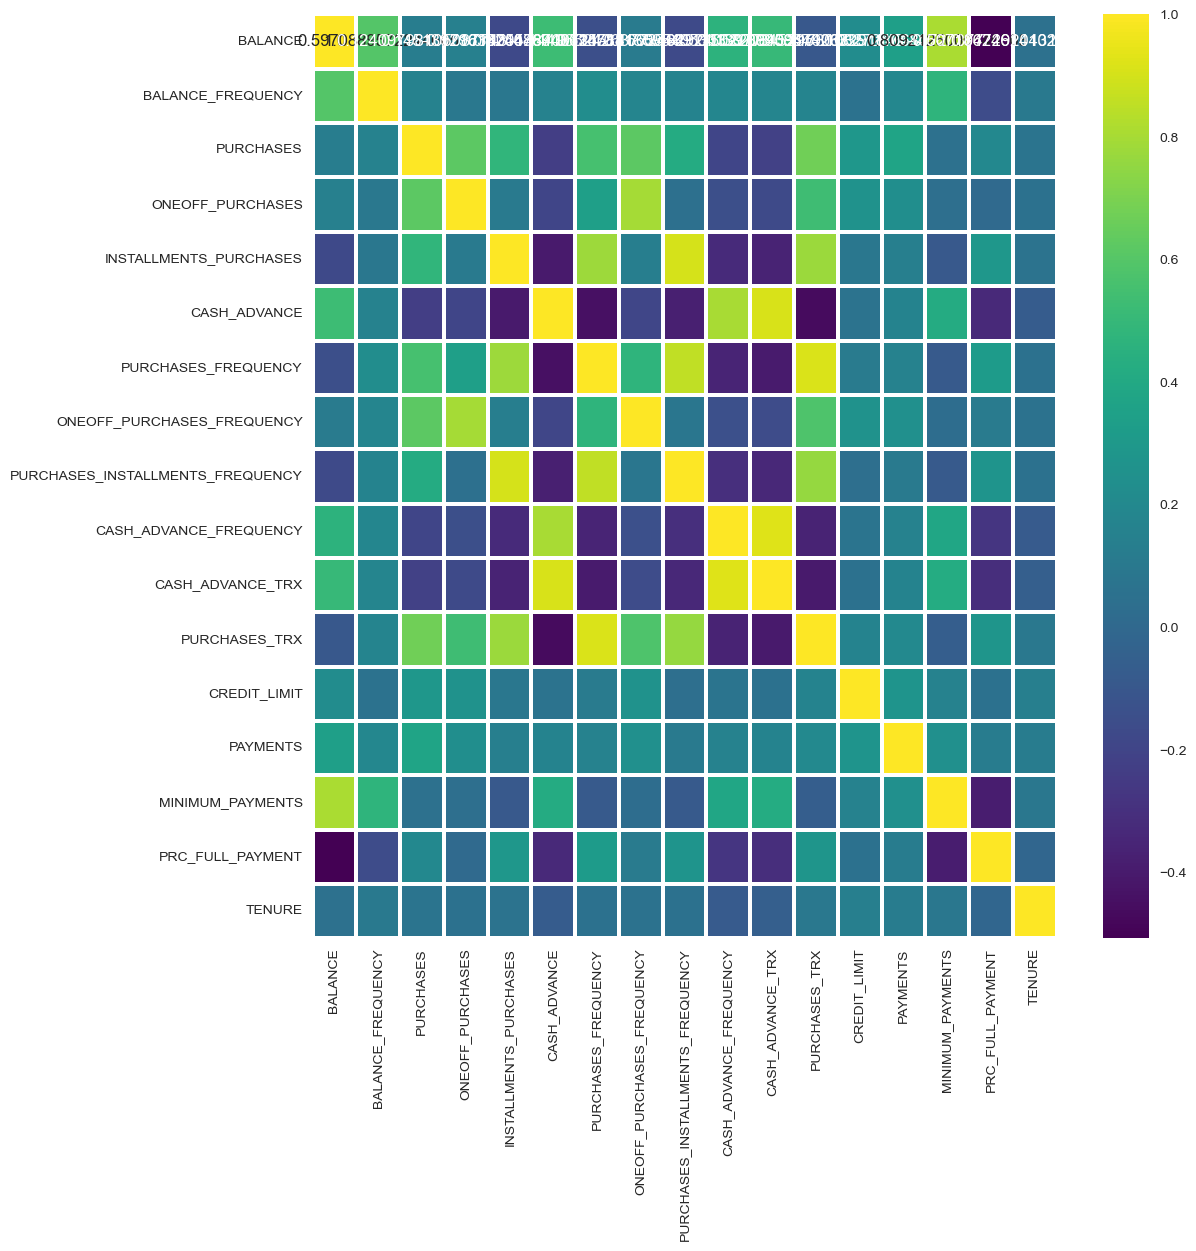

In [19]:
plt.figure(figsize=(12, 12))
sns.heatmap(final_data.corr(), cmap='viridis', annot=True, cbar=True, fmt='', linewidths=1.5)
plt.show()

# PCA to deal with highly correlated feature 

In [20]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(final_data)
PC_names = ['PC'+str(x) for x in range(1,len(pca.components_)+1)]
pca_data = pd.DataFrame(pca.transform(final_data), columns=PC_names)

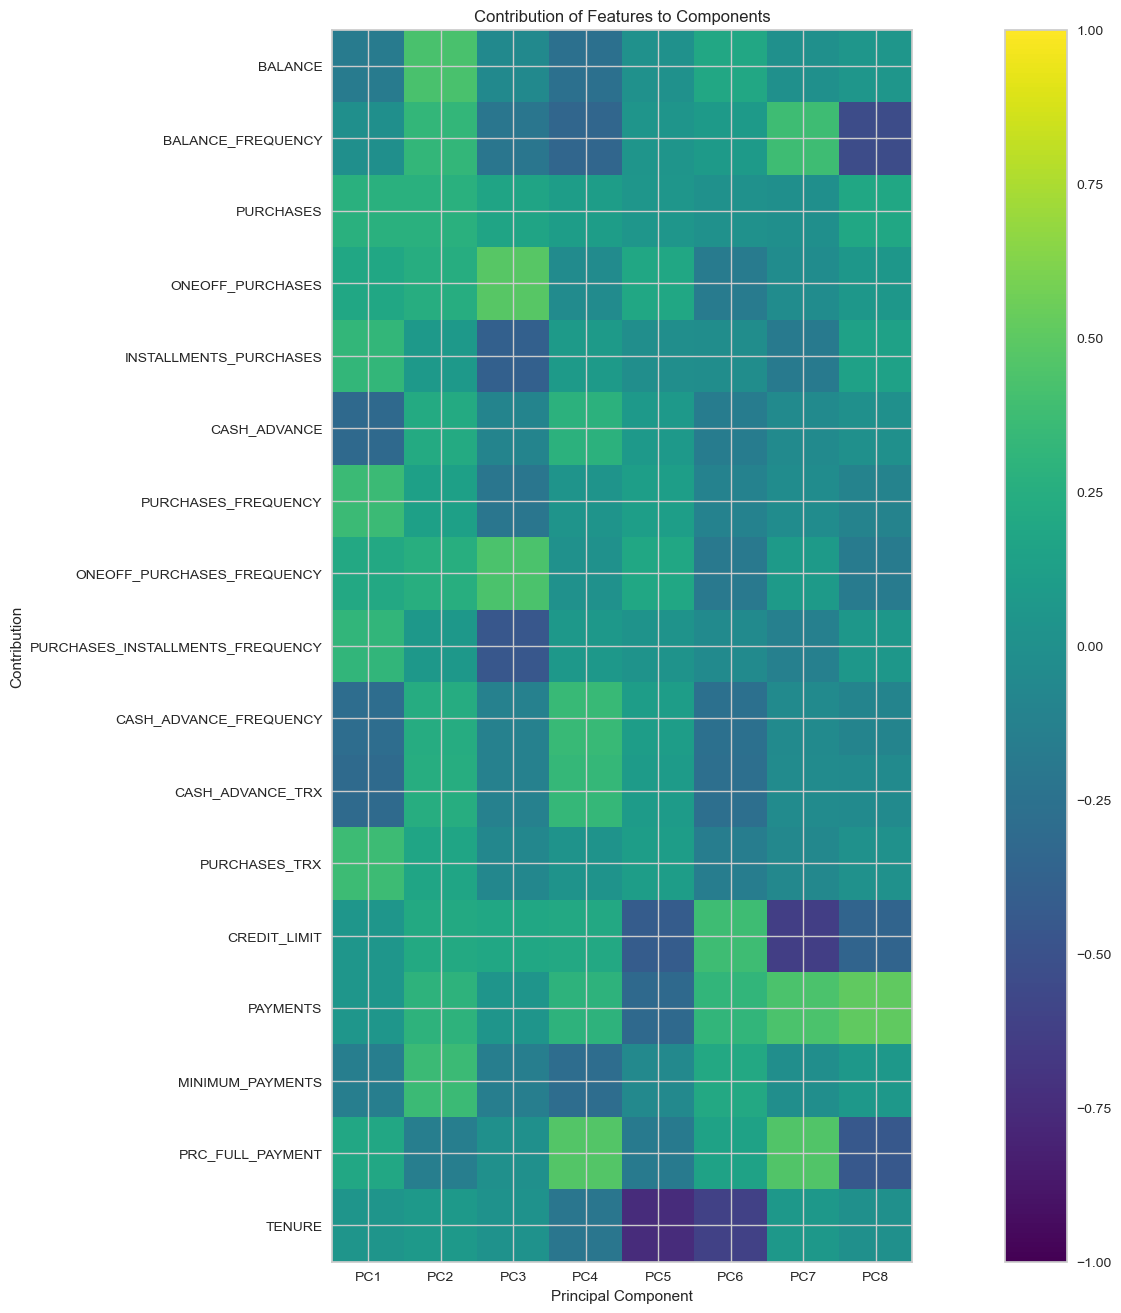

In [21]:
fig, ax = plt.subplots(figsize=(24, 16))
plt.imshow(pca.components_.T,
           cmap="viridis",
           vmin=-1,
           vmax=1,
          )
plt.yticks(range(len(final_data.columns)), final_data.columns)
plt.xticks(range(len(pca_data.columns)), pca_data.columns)
plt.xlabel("Principal Component")
plt.ylabel("Contribution")
plt.title("Contribution of Features to Components")
plt.colorbar()

# Model Builing

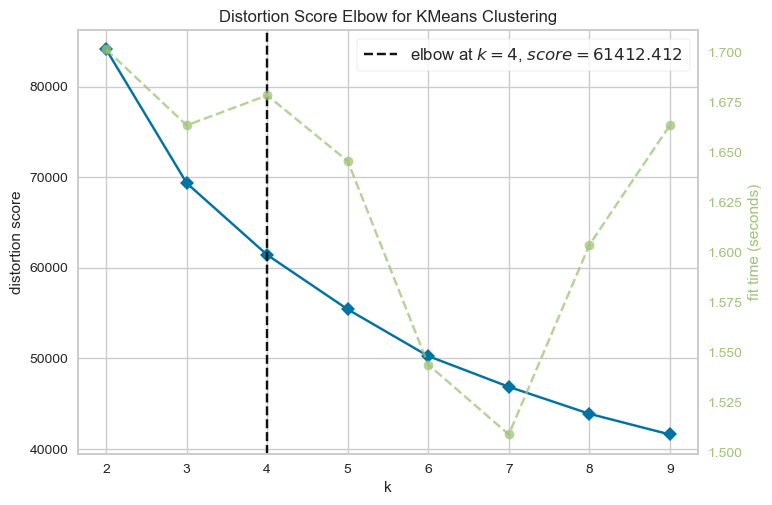

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(pca_data)       
distortion_visualizer.show()   

In [23]:
km_model = KMeans(distortion_visualizer.elbow_value_, random_state=42)
labels = km_model.fit_predict(pca_data)

In [24]:
df['LABELS']= labels
final_data['LABELS'] = labels
pca_data['LABELS'] = labels

<Axes: ylabel='count'>

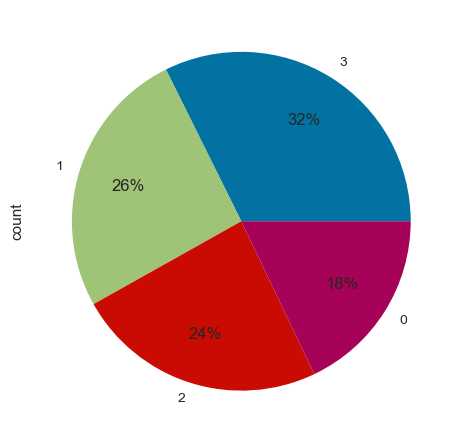

In [25]:
pca_data.LABELS.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [26]:
#The Davis-Bouldin Index is the average similarity between each cluster and the closest cluster. Scores range from 0 and up. 0 indicates better clustering.
print(f'Davies-Bouldin index = {davies_bouldin_score(pca_data, labels)}')

#the Silhouette Coefficient is a value between -1 and 1. The higher the score, the better. 1 indicates tight clusters, and 0 means overlapping clusters.
print(f'Silhouette Score = {silhouette_score(pca_data, labels)}')

Davies-Bouldin index = 1.3601267288971206
Silhouette Score = 0.2936165898626882


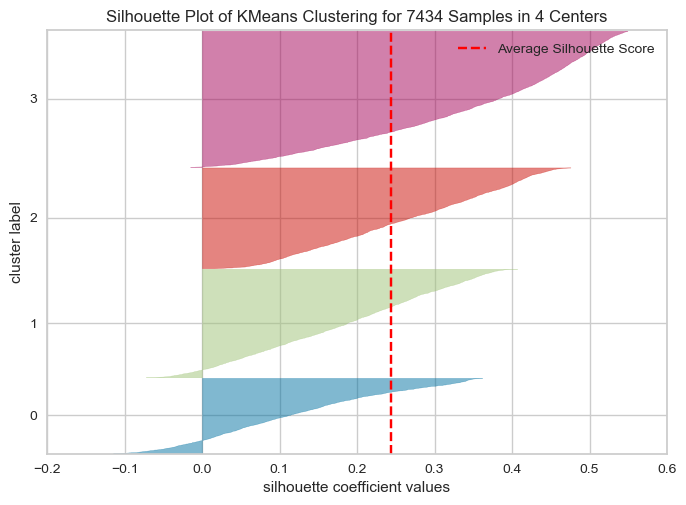

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7434 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
visualizer = SilhouetteVisualizer(km_model, colors='yellowbrick')
visualizer.fit(pca_data.drop(['LABELS'],axis=1))
visualizer.show()

In [28]:
## Evaluating Modelvisualizer = SilhouetteVisualizer(km_model, colors='yellowbrick')
visualizer.fit(pca_data.drop(['LABELS'],axis=1))
visualizer.show()

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 7434 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

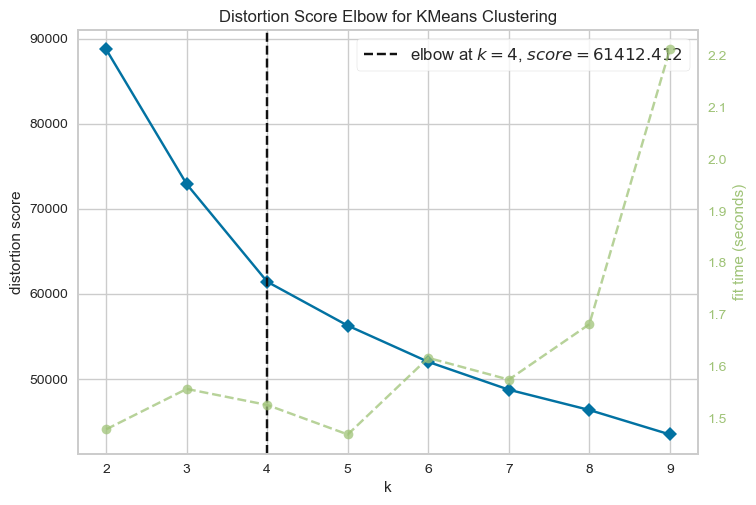

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
model = KMeans(random_state=42)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(pca_data)       
distortion_visualizer.show()  

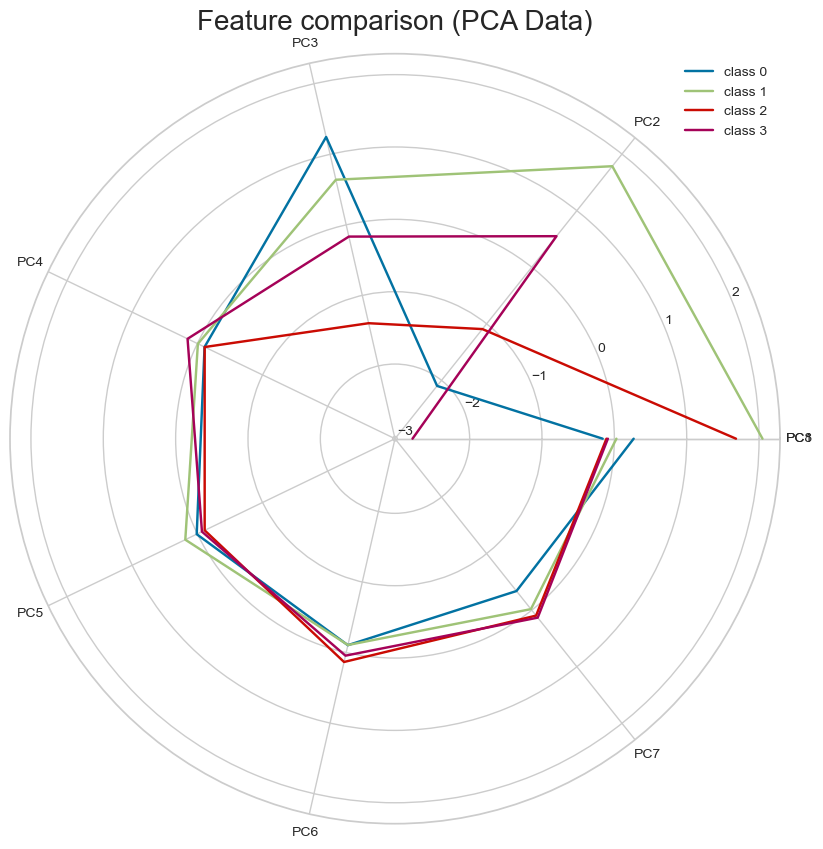

In [30]:
def spider_plot(data, title):
    means = data.groupby("LABELS").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()
spider_plot(pca_data, 'PCA Data')

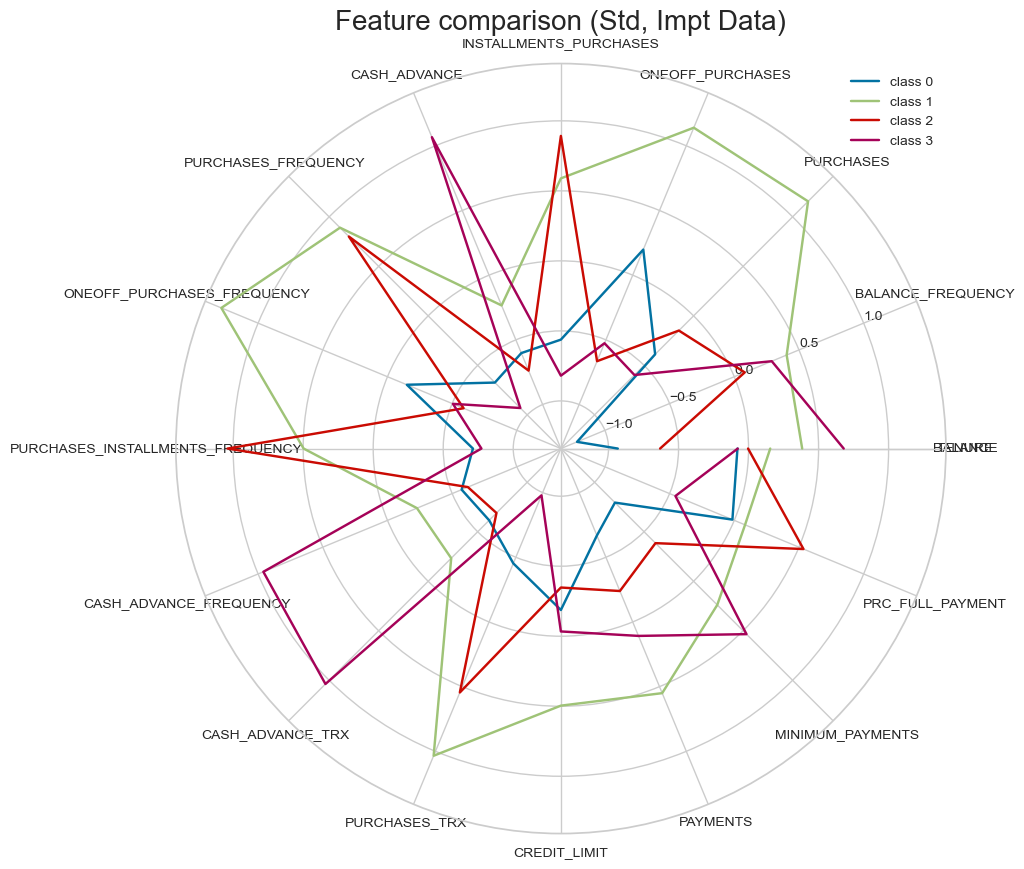

In [32]:
spider_plot(final_data, 'Std, Impt Data')



## Conclusiong in illegal activities.

**Class 0: Dreamers**

**Characteristics:**
- Low balance (lowest of all classes)
- Second highest in terms of purchases
- The lowest amount of one-off purchases and one-off purchase frequency
- Highest values of installment purchases and purchase installment frequency

**Interpretation:**
These customers may not make much money, but they utilize installment plans to make purchases, allowing them to reach for their dreams despite financial constraints.

---

**Class 1: Economicals**

**Characteristics:**
- Below-average balance
- Below-average purchases
- Very low purchase frequency

**Interpretation:**
These customers are not very wealthy and prefer not to take risks with their spending. They are frugal and value every penny.

---

**Class 2: Bourgeoisie**

**Characteristics:**
- Second highest balance
- Highest purchase frequency
- Purchase both in installments and in one-go

**Interpretation:**
These customers have a good income and are not hesitant to spend it. They enjoy a lavish lifestyle and make frequent purchases.

---

**Class 3: The Mafia**

**Characteristics:**
- Highest balance
- Lowest purchases
- Highest cash advance, cash advance frequency, and cash advance transactions

**Interpretation:**
Despite having a high balance, these customers rarely make purchases. Instead, they prefer to withdraw cash from ATMs, which may indicate suspicious behavior such as engaging in illegal activities.














